In [63]:

import numpy as np
import math,os,glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
from scipy.stats import f as scist

import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
% matplotlib inline

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/*.csv'))
print len(nc_filename)
print("found *.csv file: \n{}".format(nc_filename))



9
found *.csv file: 
['/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/IC_32_1.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/IC_Pacific_lat52.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/IC_Pacific_lat53.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa/abondant_60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Data

In [64]:
file_num=5
marker=['s','s','s','s','s','s']

WLS_err1=np.empty([file_num,1])
WLS_coef1=np.empty([file_num,1])
WLS_errc=np.empty([file_num,1])
WLS_coefc=np.empty([file_num,1])
sinking_rate=np.empty([file_num,1])

rss1=np.empty([file_num,1])
rss2=np.empty([file_num,1])


1991 ARCTIC EXPEDITION Stn1
df:(1,3)
F ratio: 4.20077266195
ftest:0.132817786116
sinking   :1.424674e+03,error:5.574048e+02

1991 ARCTIC EXPEDITION Stn2
df:(1,2)
F ratio: 2.22219638363
ftest:0.274525747758
sinking   :1.239851e+03,error:6.266856e+02

1991 ARCTIC EXPEDITION Stn3
df:(1,4)
F ratio: 55.0535763397
ftest:0.00176091336298
sinking   :1.205851e+03,error:2.561674e+02

1991 ARCTIC EXPEDITION Stn4
df:(1,3)
F ratio: 17.6463274531
ftest:0.0246203845238
sinking   :1.731415e+03,error:5.519366e+02

1991 ARCTIC EXPEDITION Stn6
df:(1,4)
F ratio: 0.67875685413
ftest:0.456302880084
sinking   :5.593981e+02,error:3.044616e+02


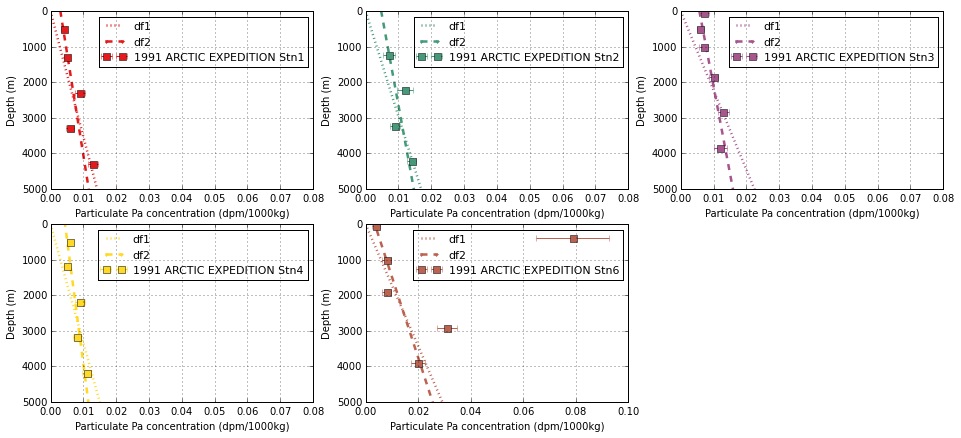

In [65]:
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    name= data['name'][0];
    x=data['231Pa part.'];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Pa_part_err']
    
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)
    
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    
    y2 = sm.add_constant(y,prepend=False)
    #y2=y
    res_wls = sm.WLS(x, y2, weights=1./err**2).fit()
    
    ftest=sm.WLS(x, y, weights=1./err**2).fit()


    model1=np.sum(ftest.resid**2/err**2)
    model2=np.sum(res_wls.resid**2/err**2)
    rss1[j]=model1
    rss2[j]=model2
    
    p1 = 1
    p2 = 2
    n = len(x)
    #F = (ftest.mse_resid - res_wls.mse_resid)/(res_wls.mse_resid) *(n-p2)/(p2-p1)
    F = ( model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    WLS_err1[j,:] = res_wls.bse[0]
    WLS_coef1[j,:] = res_wls.params[0]
    WLS_coefc[j,:]=res_wls.params[1]
    WLS_errc[j,:]=res_wls.bse[1]
    sinking_rate[j,:]=0.00246/res_wls.params[0]
    err1=(WLS_err1[j,:]/WLS_coef1[j,:])*1./WLS_coef1[j,:]*0.00246
    
    print ('')
    print (name)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('F ratio: %s'%F)
    print ('ftest:%s'%p)
    
    if F<=0:
        print ('df1 weighted resid. sum:%s'%model1)
        print ('df2 weighted resid. sum:%s'%model2)

    #print ('slope:%e,error:%e'%(res_wls.params[0],res_wls.bse[0]))
    #print ('C1   :%e,error:%e'%(res_wls.params[1],res_wls.bse[1]))
    print ('sinking   :%e,error:%e'%(sinking_rate[j,:],err1))


    #ax = plt.subplot()
    ax = plt.figure(1,figsize=(16,7))
    ax = plt.subplot(2,3,j+1)
    cc=cm.Set1(j*50)#Spectral(j*23)
    ax.plot([0, 0.07],[0, 0.07]/ftest.params[0], ':',c=cc,linewidth=2.5,label='df1')
    ax.plot([0, 0.07],[0, 0.07]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], '--.',c=cc,linewidth=2.5,label='df2')
    ax.errorbar(x, y,xerr=err, fmt=marker[j],markersize=7,c=cc,label=name)
    ax.legend(loc=0,fontsize=11)
    
    ax.set_ylim([0, 5000])
    #ax.set_xlim([0, 0.035])
#    if j+1==1 or j+1==4:
    plt.ylabel('Depth (m)')
#    if j+1==5:
    plt.xlabel('Particulate Pa concentration (dpm/1000kg)')
#    if j+1==1 or j+1==2 or j+1==3:
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==4):
#        plt.setp(ax.get_yticklabels(), visible=False)
#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)

    plt.grid()
    plt.gca().invert_yaxis()
    #plt.tight_layout()
plt.show()

In [66]:
#f_test whether the intercepts were necessary
p1 = 1
p2 = 2
n = 26
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*5)/(p2*5-p1*5)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*5,(n-p2*5)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(5,16)
F ratio: 4.18895207421
ftest:0.0517904571716


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            WLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     99.93
Date:                Wed, 15 Jul 2015   Prob (F-statistic):           0.000563
Time:                        13:49:17   Log-Likelihood:                -5.8763
No. Observations:                   5   AIC:                             13.75
Df Residuals:                       4   BIC:                             13.36
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          4.995e-05      5e-06      9.997      0.001      3.61e-05  6.38e-05
Omnibus:                          nan   Durbin-Watso

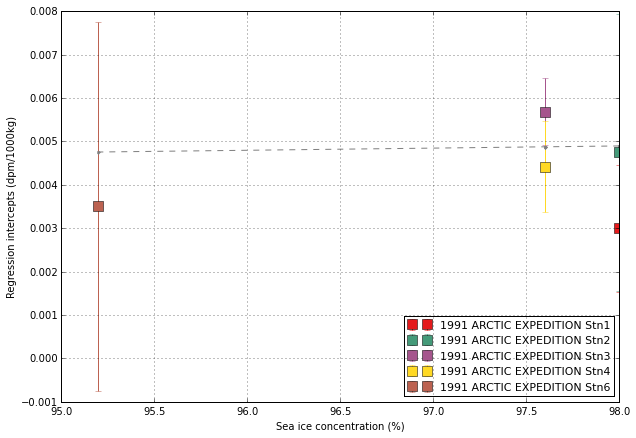

In [67]:
#test the intercepts(dust) with sea ice concentration
marker=['s','s','s','s','s','s']
i= np.array([98,98,97.6,97.6,95.2])

dust = sm.WLS(WLS_coefc,i,weights=1./WLS_errc**2).fit() 

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i,dust.fittedvalues, '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],WLS_coefc[j],yerr=WLS_errc[j],fmt=marker[j],markersize=10,c=cm.Set1(j*50),label=name)

ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Regression intercepts (dpm/1000kg)')
print dust.summary()
plt.grid()
plt.show()

In [68]:
WLS_err2=np.empty([file_num,1])
Kvalue=np.empty([file_num,1])
Jvalue=np.empty([file_num,1])
WLS_coef2=np.empty([file_num,1])
Kapa=np.empty([file_num,1])


1991 ARCTIC EXPEDITION Stn1
K   :[ 0.01045738]
J   :[ 0.30529706]
F ratio: 49.9636059811
df:(1,3)
ftest:0.00582171401566

1991 ARCTIC EXPEDITION Stn2
K   :[ 0.00991747]
J   :[ 0.31624604]
F ratio: 5.80588634634
df:(1,2)
ftest:0.137571394154

1991 ARCTIC EXPEDITION Stn3
K   :[ 0.00454194]
J   :[ 0.32789541]
F ratio: 5.85276307111
df:(1,4)
ftest:0.072822218518

1991 ARCTIC EXPEDITION Stn4
K   :[ 0.00912052]
J   :[ 0.28059319]
F ratio: 30.6663438302
df:(1,3)
ftest:0.0116066539765

1991 ARCTIC EXPEDITION Stn6
K   :[ 0.01454935]
J   :[ 0.32226066]
F ratio: 23.2458072698
df:(1,4)
ftest:0.00851440297131


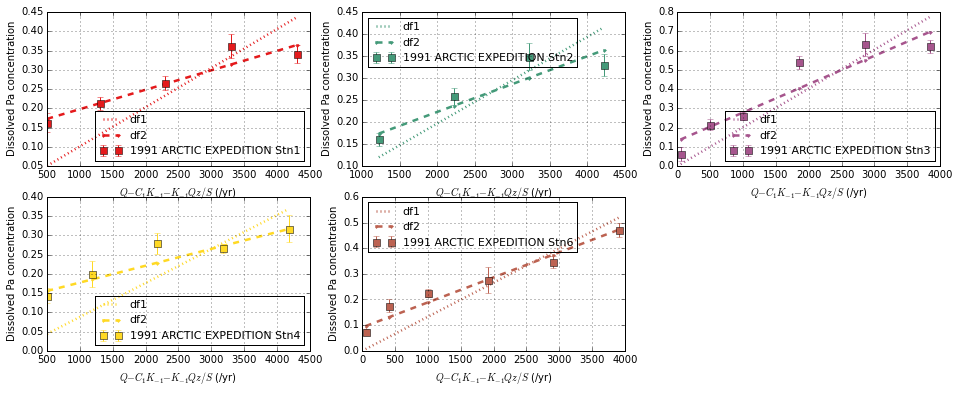

In [69]:


for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    x= data['231Pa diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Pa_diss_err']
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)      
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    
    y2=y

    #fit: model2
    y3 = sm.add_constant(y2,prepend=False)  
    res_wls2 = sm.WLS(x,y3, weights=1./err**2).fit() 
    Q=0.00246
    #Kvalue[j]=1/res_wls2.params[0]
    #err2=res_wls2.bse[0]/res_wls2.params[0]*Kvalue[j]
    a=-res_wls2.params[0]
    b=res_wls2.params[1]
    Kvalue[j]=Q**2/(b*Q-WLS_coefc[j,:]*a*sinking_rate[j,:])
    Jvalue[j]=-a*sinking_rate[j,:]/Q*Kvalue[j]
    
    
    WLS_coef2[j]=res_wls2.params[0]
    WLS_err2[j]=res_wls2.bse[0]

    
    #fit: model1
    ftest=sm.WLS(x, y2, weights=1./err**2).fit()
    #collect model1 result
    
    #calculate weighted resid. sum
    resid1=ftest.resid**2/err**2                
    model1=np.sum(resid1)

    resid2=res_wls2.resid**2/err**2
    model2=np.sum(resid2)
    
    #prepare data to recalculate the whole profile later
    rss1[j]=model1                
    rss2[j]=model2

    #f_test
    p1 = 1
    p2 = 2
    n = len(x)
    F = (model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    #print related data
    print ('')
    print (name)
    print ('K   :%s'%(Kvalue[j,:]))
    print ('J   :%s'%(Jvalue[j,:]))
    print ('F ratio: %s'%F)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('ftest:%s'%p)
    if F<=0:
        print ('df1 weighted resid. sum:%s'%model1)
        print ('df2 weighted resid. sum:%s'%model2)
        print ('df1:%s'%resid1)
        print ('df2:%s'%resid2)

    
    #plot
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*50)
    ax.plot(y2, ftest.fittedvalues, ':',c=cc,linewidth=2.5,label='df1')
    ax.plot(y2, res_wls2.fittedvalues, '--.',c=cc,linewidth=2.5,label='df2')
    ax.errorbar(y2,x,yerr=err, fmt=marker[j],markersize=7,c=cc,label=name)    
    ax.legend(loc=0,fontsize=11)
    
#    ax.set_ylim([0, 0.7])
#    ax.set_xlim([0, 0.02])
#    if j+1==1 :
    plt.ylabel('Dissolved Pa concentration')#(dpm/1000kg)')
#    if j+1==4:
#        plt.ylabel('Dissolved Pa concentration')
#    if j+1==3 or j+1==4 or j+1==5:
    plt.xlabel('$Q-C_{1}K_{-1}-K_{-1}Qz/S$ (/yr)')
#    if j+1==1 or j+1==2:
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==4):
#        plt.setp(ax.get_yticklabels(), visible=False)
#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)
    plt.grid() 
#    print(name,'p_value',round(res_wls2.pvalues[0],3),'C',round(res_wls2.params[1],3))
#    print(name,'k_pa',1/res_wls2.params[0])
plt.show()

In [70]:
p1 = 1
p2 = 2
n = 26
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*5)/(p2*5-p1*5)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*5,(n-p2*5)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(5,16)
F ratio: 13.6457867643
ftest:0.00113717264715


In [71]:
marker=['s','s','s','s','s','s']
i= np.array([98,98,97.6,97.6,95.2])

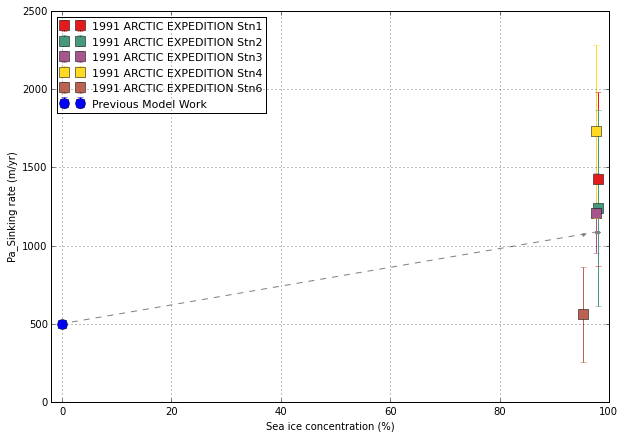

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            WLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     9.850
Date:                Wed, 15 Jul 2015   Prob (F-statistic):             0.0349
Time:                        13:49:21   Log-Likelihood:                -7.8683
No. Observations:                   6   AIC:                             19.74
Df Residuals:                       4   BIC:                             19.32
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             6.0128      1.916      3.138      0.035         0.694    11.332
const        500.0000      0.011   4.55e+04      0.0

In [72]:
##WLS: sinking rate and the ice concentration    
err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.00246
sinking_rate=np.append(sinking_rate,500)
i=np.append(i,0)
err1=np.append(err1,0.01)
i2 = sm.add_constant(i,prepend=False)
mod_wls3 = sm.WLS(sinking_rate,i2,weights=1./err1**2) #Is it the real error?
res_wls3 = mod_wls3.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls3.fittedvalues, '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=cm.Set1(j*50),label=name)

ax.errorbar(i[-1],sinking_rate[-1], yerr=err1[-1], fmt='o',markersize=10,c='blue',label='Previous Model Work')
ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Pa_Sinking rate (m/yr)')

#ax.set_ylim([0, 5000])
ax.set_xlim([-2, 100])
plt.grid()
plt.show()
print res_wls3.summary()

In [73]:
from statsmodels.formula.api import wls
from scipy.stats import f as scist
data = pd.DataFrame({'sinking_rate':sinking_rate, 'i3': i})
res_wls5 = wls('sinking_rate~i3', data,weights=1./(err1**2)).fit()
a=average(sinking_rate)
rss=(sinking_rate-a)**2/err1**2
rss_sum=sum(rss)
p1 = 1
p2 = 2
n = file_num
F = (rss_sum - np.sum(res_wls5.resid**2/err1**2))/(np.sum(res_wls5.resid**2/err1**2)) *(n-p2)/(p2-p1)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('F ratio: %s'%F)
print ('df:(%s,%s)'%((p2-p1),(n-p2)))
print ('ftest:%s'%p)

F ratio: 2308511035.24
df:(1,3)
ftest:1.98729921408e-14


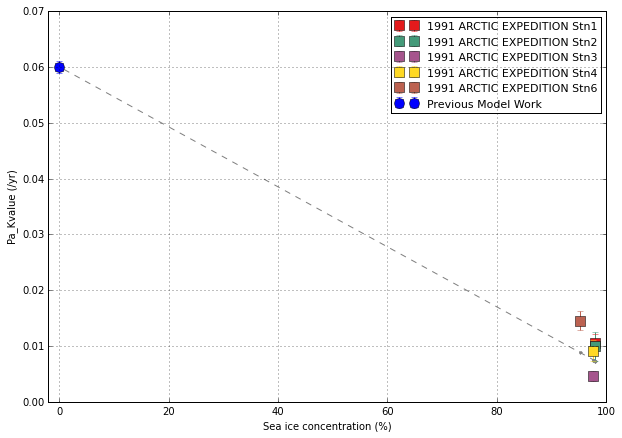

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            WLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     285.8
Date:                Wed, 15 Jul 2015   Prob (F-statistic):           7.18e-05
Time:                        13:49:22   Log-Likelihood:                -13.011
No. Observations:                   6   AIC:                             30.02
Df Residuals:                       4   BIC:                             29.61
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0005   3.18e-05    -16.905      0.000        -0.001    -0.000
const          0.0600      0.003     23.168      0.0

In [74]:
##WLS: K value and the ice concentration


err2=WLS_err2/WLS_coef2*Kvalue
#err2= ((WLS_err1/WLS_coef1)+(WLS_err2/WLS_coef2))* WLS_coef1/WLS_coef2# error of k value K-1=1
#(WLS_coef1**(-4)*(WLS_coef2**(-2))*(WLS_err1)**2+WLS_coef2**(-4)*(WLS_coef1**(-2))*(WLS_err2)**2)**(0.5)
#((WLS_err1/WLS_coef1)**2+(WLS_err2/WLS_coef2)**2)**(0.5) # error of k value K-1=1

Kvalue=numpy.append(Kvalue,0.06)#0.06
err2=numpy.append(err2,0.001)

mod_wls4 = sm.WLS(Kvalue, i2, weights=1./(err2**2))
res_wls4 = mod_wls4.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls4.fittedvalues,  '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*50),label=name)
errorbar(i[-1],Kvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='Previous Model Work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Pa_Kvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()
print res_wls4.summary()

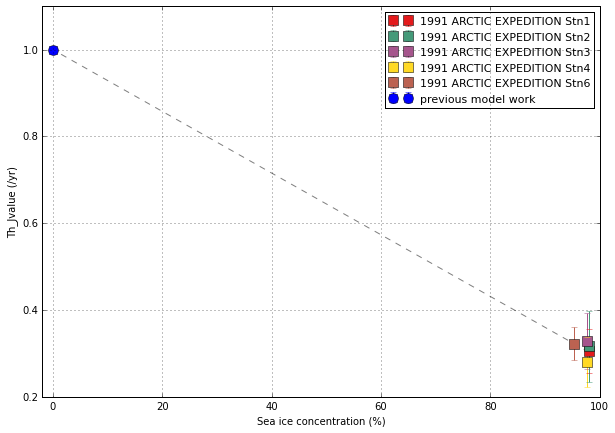

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     9823.
Date:                Wed, 15 Jul 2015   Prob (F-statistic):           6.21e-08
Time:                        13:49:23   Log-Likelihood:                0.12412
No. Observations:                   6   AIC:                             3.752
Df Residuals:                       4   BIC:                             3.335
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0071   7.18e-05    -99.111      0.000        -0.007    -0.007
const          1.0000      0.000   3444.895      0.0

In [75]:
err2=WLS_err2/WLS_coef2*Jvalue

Jvalue=numpy.append(Jvalue,1.0)
err2=numpy.append(err2,0.001)

mod_wls4 = sm.WLS(Jvalue, i2, weights=1./err2**2).fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, mod_wls4.fittedvalues,  '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Jvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*50),label=name)
    
errorbar(i[-1],Jvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Jvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()
print mod_wls4.summary()

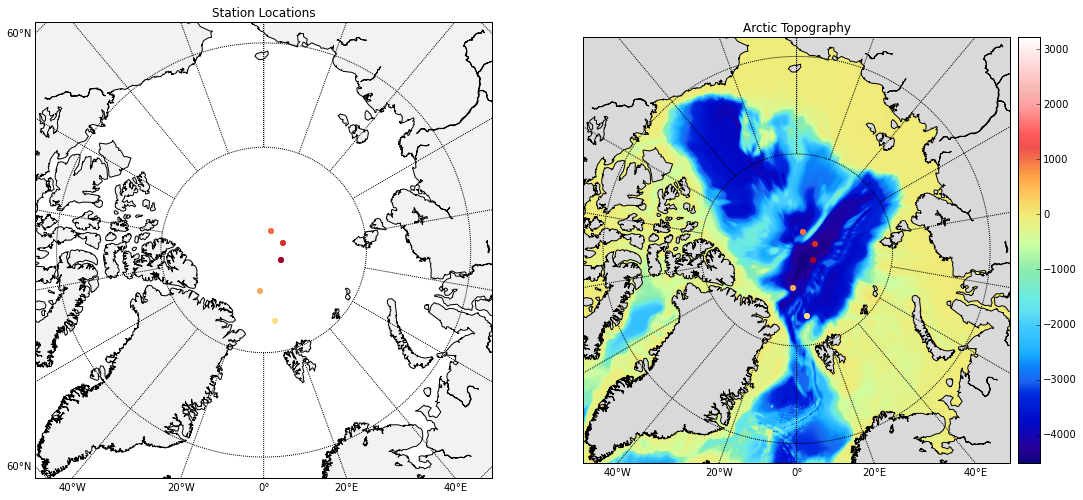

In [76]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(121)

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=68,lon_0=0,resolution='l')
for j in range(5):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.RdYlGn(j*25))
    
plt.title("Station Locations")
m.drawcoastlines()
m.fillcontinents(color = '0.95')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

ax = fig.add_subplot(122)
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)

topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)
m = Basemap(projection='npstere',boundinglat=68,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

for j in range(5):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.RdYlGn(j*25))

nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)    
from mpl_toolkits.basemap import cm    
im = m.imshow(topodat,cm.GMT_haxby)
cb = m.colorbar(im,"right", size="5%", pad='2%')
plt.title("Arctic Topography")
plt.show()